# Exploración de dimensiones

In [1]:
#Importar librerias

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

In [3]:
# Cargar variables de entorno
load_dotenv()
db_url = os.getenv("DATABASE_URL")

In [4]:
# Inicializar la base de datos
engine = create_engine(db_url)

In [5]:
# Definir estilo de gráficos
sns.set_style("whitegrid")

## Distribución de categorías de productos

In [6]:
df_productos = pd.read_sql("SELECT categoria FROM productos", con=engine)
conteo_categorias = df_productos["categoria"].value_counts().reset_index()
conteo_categorias.columns = ["Categoría", "Cantidad"]
display(conteo_categorias) 

,Categoría,Cantidad
0,Abarrotes,219
1,Salud,204
2,Ropa,196
3,Electrónica,192
4,Hogar,169


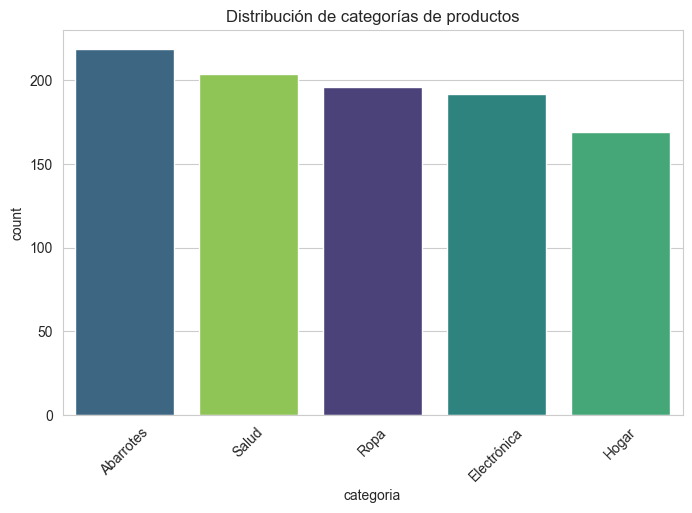

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_productos, x="categoria", order=df_productos["categoria"].value_counts().index, hue="categoria", palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Distribución de categorías de productos")
plt.show()

- La categoría más frecuente es "Abarrotes" con 219, lo que sugiere que la mayoría de las ventas pueden estar relacionadas con productos básicos.

- Las categorías con menor representación son Electrónica y Hogar. Esto puede indicar que hay más variedad de productos en categorías como Abarrotes, mientras que otras categorías podrían estar subrepresentadas.

## Distribución de género de clientes

In [8]:
df_clientes = pd.read_sql("SELECT genero FROM clientes", con=engine)
conteo_genero = df_clientes["genero"].value_counts().reset_index()
conteo_genero.columns = ["Género", "Cantidad"]
display(conteo_genero)

,Género,Cantidad
0,Femenino,16372
1,Otro,16366
2,Masculino,16262


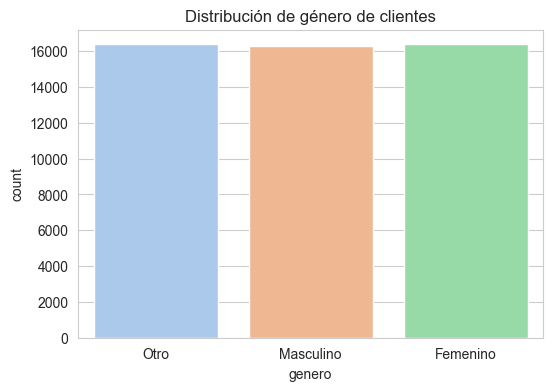

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clientes, x="genero",hue="genero", palette="pastel")
plt.title("Distribución de género de clientes")
plt.show()

- La diferencia entre Femenino, Masculino, y Otro es muy pequeña, con la mayoría de los clientes en la categoría Femenino (16,372), seguido de Otro (16,366).

- La categoría Masculino tiene ligeramente menos representación, pero sigue siendo comparable. Esto podría reflejar una distribución bastante equilibrada en cuanto a género.

## Distribución de la ubicación de los clientes

In [10]:
df_ubicacion = pd.read_sql("SELECT ubicacion FROM clientes", con=engine)
conteo_ubicacion = df_ubicacion["ubicacion"].value_counts().reset_index()
conteo_ubicacion.columns = ["Ubicación", "Cantidad"]
display(conteo_ubicacion)

,Ubicación,Cantidad
0,Tijuana,9989
1,Puebla,9824
2,Cdmx,9766
3,Monterrey,9714
4,Guadalajara,9707


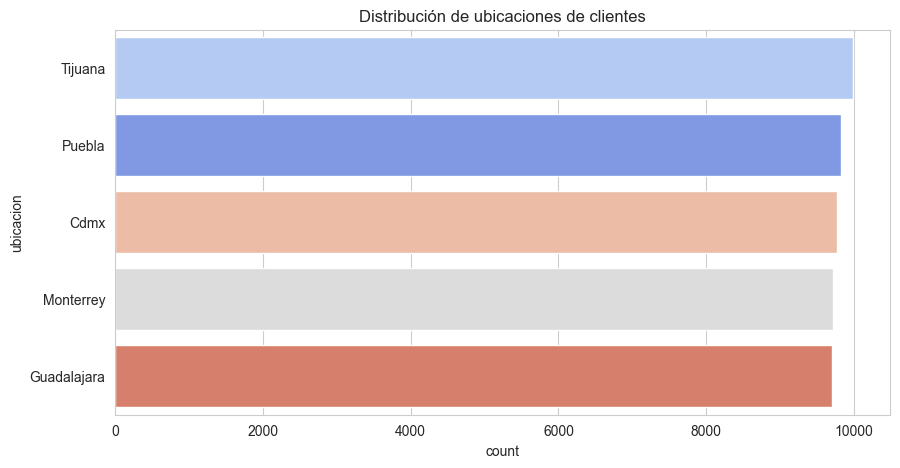

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_ubicacion, y="ubicacion", order=df_ubicacion["ubicacion"].value_counts().index[:10], hue="ubicacion", palette="coolwarm")
plt.title("Distribución de ubicaciones de clientes")
plt.show()

- Las ciudades con mayor número de clientes son Tijuana (9,989), seguida de Puebla (9,824).

- Hay una ligera diferencia entre las ubicaciones, pero en general, las cifras están bastante equilibradas en cuanto a las ciudades más representadas.

## Distribución de la ubicación de los proveedores

In [12]:
df_proveedores = pd.read_sql("SELECT ubicacion FROM proveedores", con=engine)
conteo_ubicacion = df_ubicacion["ubicacion"].value_counts().reset_index()
conteo_ubicacion.columns = ["Ubicación", "Cantidad"]
display(conteo_ubicacion)

,Ubicación,Cantidad
0,Tijuana,9989
1,Puebla,9824
2,Cdmx,9766
3,Monterrey,9714
4,Guadalajara,9707


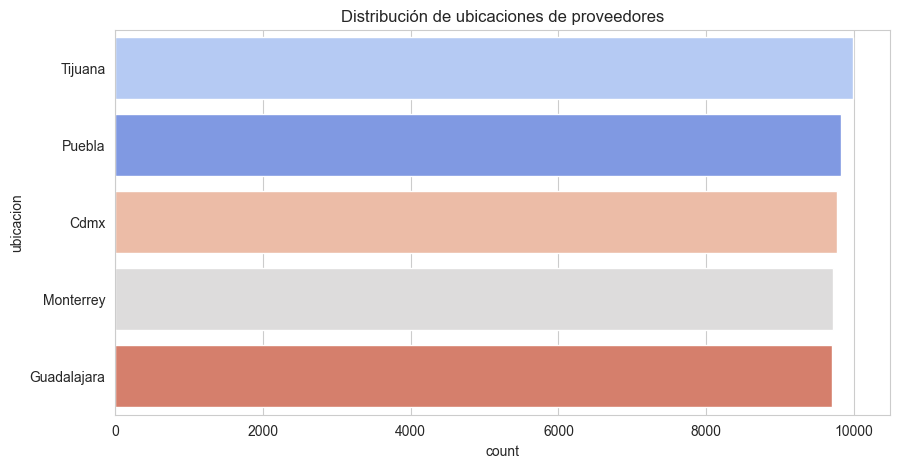

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_ubicacion, y="ubicacion", order=df_ubicacion["ubicacion"].value_counts().index[:10], hue="ubicacion", palette="coolwarm")
plt.title("Distribución de ubicaciones de proveedores")
plt.show()

- Los proveedores están distribuidos entre las mismas ciudades, con Tijuana siendo la ciudad con mayor representación (9,989), seguida por Puebla (9,824).

- Este análisis es útil para entender si las ubicaciones de los proveedores están distribuidas de forma similar a la de los clientes, lo que podría impactar en la logística y en la eficiencia de la cadena de suministro.

## Distribución del estado de envíos

In [14]:
df_envios = pd.read_sql("SELECT estado_envio FROM envios", con=engine)
conteo_envios = df_envios["estado_envio"].value_counts().reset_index()
conteo_envios.columns = ["Estado de Envío", "Cantidad"]
display(conteo_envios)

,Estado de Envío,Cantidad
0,En tránsito,4528
1,Retrasado,4524
2,Entregado,4447
3,Cancelado,4378


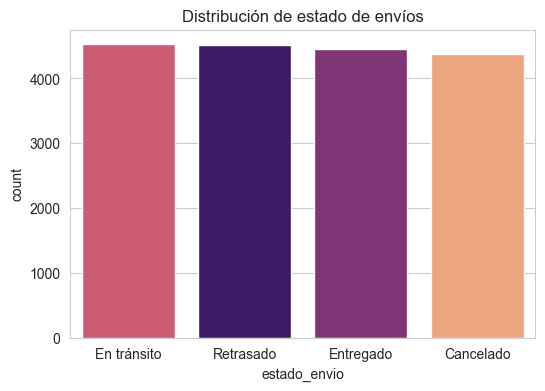

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_envios, x="estado_envio", order=df_envios["estado_envio"].value_counts().index, hue="estado_envio", palette="magma")
plt.title("Distribución de estado de envíos")
plt.show()

- La mayoría de los envíos están en estado En tránsito (22,818), seguido por Retrasado (22,708) y Cancelado (22,602).

- Entregado tiene la menor cantidad (22,476), lo que indica que un número considerable de envíos aún no se han completado o entregado.